<a href="https://colab.research.google.com/github/rishav197/DL-assignments-IIITD/blob/main/A4/Q1/DL_A4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob # To find image paths
from google.colab.patches import cv2_imshow


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import json
with open("/content/drive/MyDrive/hateful_memes/train.jsonl") as f:
  train_data = [json.loads(line) for line in f]

with open("/content/drive/MyDrive/hateful_memes/dev_seen.jsonl") as f:
  valid_data = [json.loads(line) for line in f]

with open("/content/drive/MyDrive/hateful_memes/test_seen.jsonl") as f:
  test_data = [json.loads(line) for line in f]

print(type(train_data), len(train_data))
print(type(valid_data), len(valid_data))
print(type(test_data), len(test_data))

<class 'list'> 8500
<class 'list'> 500
<class 'list'> 1000


In [ ]:
train_data[:4]

[{'id': '42953',
  'img': 'img/42953.png',
  'label': 0,
  'text': 'its their character not their color that matters'},
 {'id': '23058',
  'img': 'img/23058.png',
  'label': 0,
  'text': "don't be afraid to love again everyone is not like your ex"},
 {'id': '13894',
  'img': 'img/13894.png',
  'label': 0,
  'text': 'putting bows on your pet'},
 {'id': '37408',
  'img': 'img/37408.png',
  'label': 0,
  'text': 'i love everything and everybody! except for squirrels i hate squirrels'}]

(618, 825)


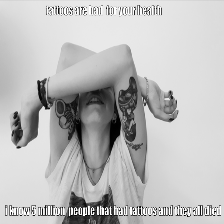

255 50176


In [ ]:
path = "/content/drive/MyDrive/hateful_memes/"
img = path + train_data[1]['img']

img = cv2.imread("/content/drive/MyDrive/hateful_memes/img/70914.png")
# print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
img = cv2.resize(img, (224, 224))
cv2_imshow(img)
img = img.reshape(-1,)
print(np.max(img), len(img))

### Preparing Train set

In [ ]:
path = "/content/drive/MyDrive/hateful_memes/"

y_train = np.zeros(len(train_data))
print(len(y_train), type(y_train))
img_size = 64
X_train = np.empty((len(train_data), img_size, img_size))
print(len(X_train), X_train.shape)


for idx in range(len(train_data)):
  print(idx)
  img_dict = train_data[idx]
  # print(img_dict)
  label = img_dict['label']
  y_train[idx] = label

  img_path = path+img_dict['img']
  # print(img_path)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(img, (img_size, img_size))
  X_train[idx] = resized_img


In [ ]:
print(X_train.shape)
print(y_train.shape)

(8500, 64, 64)
(8500,)


### Preparing Validation set

In [ ]:
path = "/content/drive/MyDrive/hateful_memes/"

y_valid = np.zeros(len(valid_data))
print(len(y_valid), type(y_valid))

img_size = 64
X_valid = np.empty((len(valid_data), img_size, img_size))
print(len(X_valid), X_valid.shape)


for idx in range(len(valid_data)):
  print(idx)
  img_dict = valid_data[idx]
  # print(img_dict)
  label = img_dict['label']
  y_valid[idx] = label

  img_path = path+img_dict['img']
  # print(img_path)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(img, (img_size, img_size))
  X_valid[idx] = resized_img


In [ ]:
print(X_valid.shape)
print(y_valid.shape)

(500, 64, 64)
(500,)


### Preparing Test set

In [ ]:
path = "/content/drive/MyDrive/hateful_memes/"

y_test = np.zeros(len(test_data))
print(len(y_test), type(y_test))

img_size = 64
X_test = np.empty((len(test_data), img_size, img_size))
print(len(X_test), X_test.shape)


for idx in range(len(test_data)):
  print(idx)
  img_dict = test_data[idx]
  # print(img_dict)
  label = img_dict['label']
  y_test[idx] = label

  img_path = path+img_dict['img']
  # print(img_path)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(img, (img_size, img_size))
  X_test[idx] = resized_img


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000,)


In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

print(X_test.shape)
print(y_test.shape)

(8500, 64, 64)
(8500,)
(500, 64, 64)
(500,)
(1000, 64, 64)
(1000,)


In [ ]:
max(X_train[4].reshape(-1,))

255.0

In [ ]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([5481, 3019]))

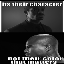

In [ ]:
cv2_imshow(X_train[0])

In [ ]:
max(X_train[6].reshape(-1, ))

255.0

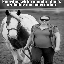

1.0


In [ ]:
cv2_imshow(X_valid[5])
print(y_valid[5])

#### Normalizing the data sets

In [ ]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

### Part 2) Model-VGG16 and its Architecture

In [ ]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
# Model parameters
shape_of_img = (64,64,1)

input_img = Input(shape=shape_of_img)
print(input_img)

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
#VGG16 architecture

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_mx_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_mx_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_mx_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_mx_pool')(x)

#Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_mx_pool')(x)


# Classification block
x = Flatten(name='flatten_input')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(2, activation='softmax', name='predictions')(x)


model = Model(inputs = input_img, outputs = x, name='VGG16')

In [ ]:
model.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_mx_pool (MaxPooling2  (None, 32, 32, 64)       0         
 D)                                                              
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                             

In [ ]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model_train_history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
266/266 [==============================] - 31s 54ms/step - loss: 0.6563 - accuracy: 0.6428
Epoch 2/10
266/266 [==============================] - 13s 49ms/step - loss: 0.6529 - accuracy: 0.6448
Epoch 3/10
266/266 [==============================] - 13s 49ms/step - loss: 0.6515 - accuracy: 0.6448
Epoch 4/10
266/266 [==============================] - 13s 49ms/step - loss: 0.6518 - accuracy: 0.6448
Epoch 5/10
266/266 [==============================] - 13s 50ms/step - loss: 0.6513 - accuracy: 0.6448
Epoch 6/10
266/266 [==============================] - 13s 51ms/step - loss: 0.6512 - accuracy: 0.6448
Epoch 7/10
266/266 [==============================] - 14s 51ms/step - loss: 0.6512 - accuracy: 0.6448
Epoch 8/10
266/266 [==============================] - 14s 53ms/step - loss: 0.6510 - accuracy: 0.6448
Epoch 9/10
266/266 [==============================] - 14s 53ms/step - loss: 0.6511 - accuracy: 0.6448
Epoch 10/10
266/266 [==============================] - 14s 51ms/step - loss: 0.651

In [ ]:
model_valid_history = model.fit(X_valid, y_valid, epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 52ms/step - loss: 0.7240 - accuracy: 0.5060
Epoch 2/10
16/16 [==============================] - 1s 49ms/step - loss: 0.6999 - accuracy: 0.5060
Epoch 3/10
16/16 [==============================] - 1s 49ms/step - loss: 0.6957 - accuracy: 0.5060
Epoch 4/10
16/16 [==============================] - 1s 51ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 5/10
16/16 [==============================] - 1s 52ms/step - loss: 0.6931 - accuracy: 0.5060
Epoch 6/10
16/16 [==============================] - 1s 53ms/step - loss: 0.6933 - accuracy: 0.5060
Epoch 7/10
16/16 [==============================] - 1s 52ms/step - loss: 0.6931 - accuracy: 0.5060
Epoch 8/10
16/16 [==============================] - 1s 50ms/step - loss: 0.6931 - accuracy: 0.5060
Epoch 9/10
16/16 [==============================] - 1s 50ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 10/10
16/16 [==============================] - 1s 50ms/step - loss: 0.6932 - accuracy: 0.5060


### Part 3) Plots

In [ ]:
train_loss = model_train_history.history['loss']
valid_loss = model_valid_history.history['loss']
print(len(train_loss), train_loss)
print(len(valid_loss), valid_loss)


train_accu = model_train_history.history['accuracy']
valid_accu = model_valid_history.history['accuracy']
# print(train_accu)
# print(valid_accu)

10 [0.6562662720680237, 0.6528827548027039, 0.6514920592308044, 0.6518349647521973, 0.6512972116470337, 0.6511578559875488, 0.6512132287025452, 0.6509846448898315, 0.6510982513427734, 0.6515316367149353]
10 [0.7239704132080078, 0.6998786330223083, 0.6956936120986938, 0.6932557225227356, 0.6931341290473938, 0.6933122873306274, 0.6930875182151794, 0.6931237578392029, 0.6931613683700562, 0.6931840777397156]


In [ ]:
train_accuracy = [ele*100 for ele in train_accu]
valid_accuracy = [ele*100 for ele in valid_accu]

print(len(train_accuracy), train_accuracy)
print(len(valid_accuracy), valid_accuracy)

10 [64.28235173225403, 64.48235511779785, 64.48235511779785, 64.48235511779785, 64.48235511779785, 64.48235511779785, 64.48235511779785, 64.48235511779785, 64.48235511779785, 64.48235511779785]
10 [50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515, 50.599998235702515]


In [ ]:
# epoch_arr = [num for num in range(1, len(train_loss)+1)]
# epoch_arr

#### Train Loss and Validation Loss vs Epochs

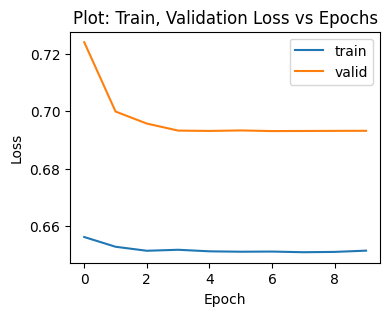

In [ ]:
# plot for training loss and validation loss
# plot for train loss vs epochs
plt.figure(figsize=(4,3))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.title("Plot: Train, Validation Loss vs Epochs")
plt.ylabel("Loss")   
plt.xlabel("Epoch")
plt.legend(['train', 'valid'], loc='upper right')
plt.savefig("train_valid_loss_epochs.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()

#### Train accuracy and Validation accuracy vs Epochs

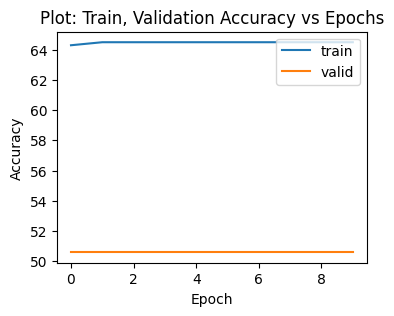

In [ ]:
# plot for training accuracy and validation accuracy
# plot for train accuracy vs epochs
plt.figure(figsize=(4,3))
plt.plot(train_accuracy)
plt.plot(valid_accuracy)
plt.title("Plot: Train, Validation Accuracy vs Epochs")
plt.ylabel("Accuracy")   
plt.xlabel("Epoch")
plt.legend(['train', 'valid'], loc='upper right')
plt.savefig("train_valid_accu_epochs.png", bbox_inches="tight", pad_inches=2, transparent=False)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

32/32 [==============================] - 1s 23ms/step


In [ ]:
print(len(y_pred), y_pred)
np.unique(y_pred)

1000 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

array([0])

### Part4) Class-wise precision, recall and F1-score

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
print("Accuracy = {}".format(round(accuracy_score(y_test, y_pred), 2)))
print("Precision = {}".format(round(precision_score(y_test, y_pred), 2)))
print("Recall = {}".format(round(recall_score(y_test, y_pred), 2)))
print("F1-score = {}".format(round(f1_score(y_test, y_pred), 2)))

Accuracy = 0.51
Precision = 0.0
Recall = 0.0
F1-score = 0.0


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68       510
         1.0       0.00      0.00      0.00       490

    accuracy                           0.51      1000
   macro avg       0.26      0.50      0.34      1000
weighted avg       0.26      0.51      0.34      1000

